# Univariate Feature Selection (UFS) 

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, chi2

# Load dataset and its features
data = load_wine()
print("Fetaures of Wine Dataset:")
print(data.feature_names)
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Apply SelectKBest with chi-squared test
selector = SelectKBest(score_func=chi2, k=2)  # Select top 2 features
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features Using Univaraite Feature Selection Technique:")
print(selected_features)


C:\Users\Leekha\anaconda35\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Fetaures of Wine Dataset:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Selected Features Using Univaraite Feature Selection Technique:
Index(['color_intensity', 'proline'], dtype='object')


# Recursive Feature Elimination (RFE)

In [2]:
# Import necessary features
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Load the Iris dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Initialize a Logistic Regression model
model = LogisticRegression()

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=2)  # We want the top 2 features
X_rfe = rfe.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

# Print the ranking of all features
print("\nFeature Ranking (1 = selected):")
print(pd.Series(rfe.ranking_, index=X.columns))


Selected Features:
Index(['alcohol', 'flavanoids'], dtype='object')

Feature Ranking (1 = selected):
alcohol                          1
malic_acid                       7
ash                              3
alcalinity_of_ash                8
magnesium                       11
total_phenols                   10
flavanoids                       1
nonflavanoid_phenols             6
proanthocyanins                  9
color_intensity                  4
hue                              5
od280/od315_of_diluted_wines     2
proline                         12
dtype: int32


C:\Users\Leekha\anaconda35\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Leekha\anaconda35\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

# Principal Component Analysis (PCA)

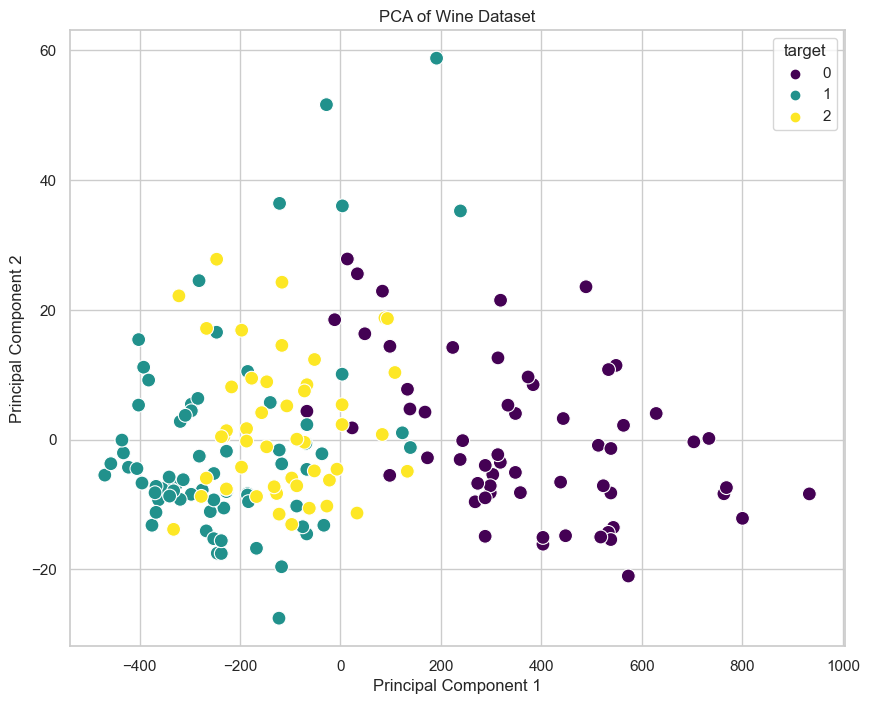

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Initialize PCA and reduce the dataset to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['target'] = y
# Set the style of the plot
sns.set(style="whitegrid")

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', palette='viridis', data=X_pca_df, s=100)

# Add labels and title
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


# Feature Importance

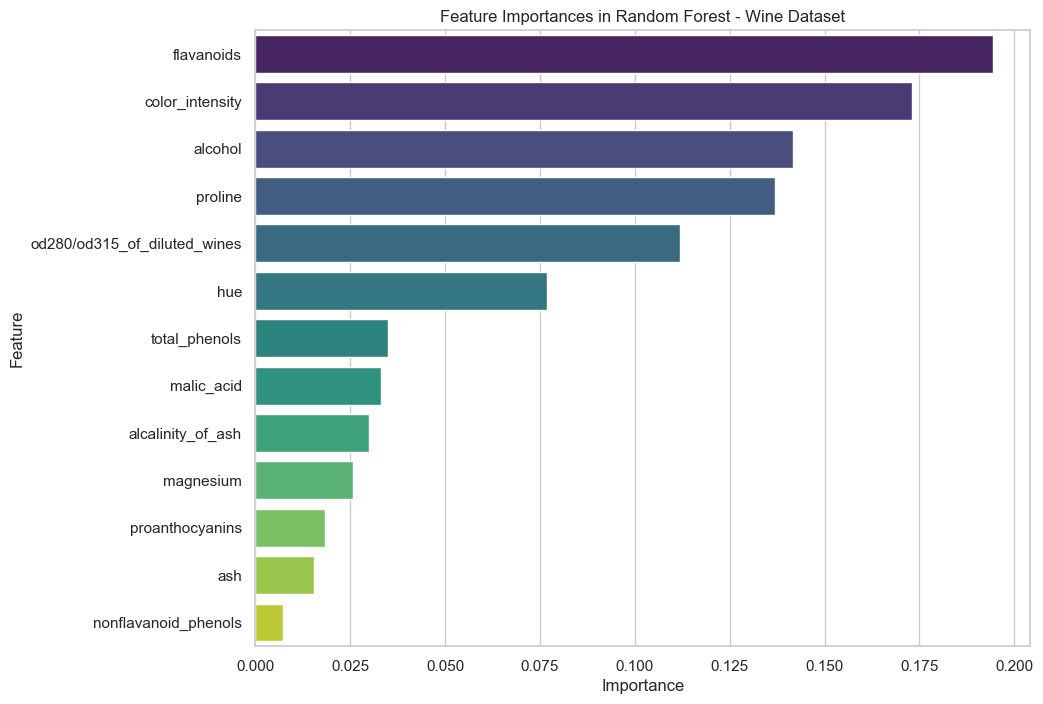

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
# Create a DataFrame for easy visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Set the style of the plot
sns.set(style="whitegrid")

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances in Random Forest - Wine Dataset')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# L1 Regularization (Lasso)

In [5]:
# Import the necessary features
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso regression model with a regularization parameter alpha
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients:")
print(coefficients)

# Check which features have been reduced to zero
important_features = coefficients[coefficients != 0]
print("\nSelected Features (Non-zero coefficients):")
print(important_features)


Mean Squared Error: 0.09318492434556226
Lasso Coefficients:
alcohol                        -0.000000
malic_acid                      0.000000
ash                            -0.000000
alcalinity_of_ash               0.027864
magnesium                       0.000000
total_phenols                  -0.000000
flavanoids                     -0.300626
nonflavanoid_phenols            0.000000
proanthocyanins                -0.000000
color_intensity                 0.099298
hue                            -0.000000
od280/od315_of_diluted_wines   -0.000000
proline                        -0.001197
dtype: float64

Selected Features (Non-zero coefficients):
alcalinity_of_ash    0.027864
flavanoids          -0.300626
color_intensity      0.099298
proline             -0.001197
dtype: float64
